Let's see if there is a leak, i.e. if cmsRun slows down as the number of events processed increases. We have recorded the output of `cmsRun` to file (`cmsrun.log`).

In [68]:
import matplotlib.pyplot as plt
import re
import datetime
import matplotlib as mpl

%matplotlib inline

mpl.rcParams['font.size'] = 16

In [3]:
interesting_lines = []

with open('cmsrun.log') as f:
    for line in f:
        if "Begin processing" in line:
            interesting_lines.append(line.strip())

In [82]:
print interesting_lines[0]

Begin processing the 1st record. Run 1, Event 655011, LumiSection 4382 at 16-Apr-2016 13:38:43.133 BST


In [62]:
event_counts = [int(re.findall(r'the ([0-9]+)st record', line)[0]) for line in interesting_lines]

In [77]:
timestamps = [re.findall(r'at (.*)$', line)[0] for line in interesting_lines]

In [78]:
timestamps = [datetime.datetime.strptime(ts, '%d-%b-%Y %H:%M:%S.%f %Z') for ts in timestamps]

In [79]:
delta_times = [(ts - timestamps[0]).total_seconds() for ts in timestamps]

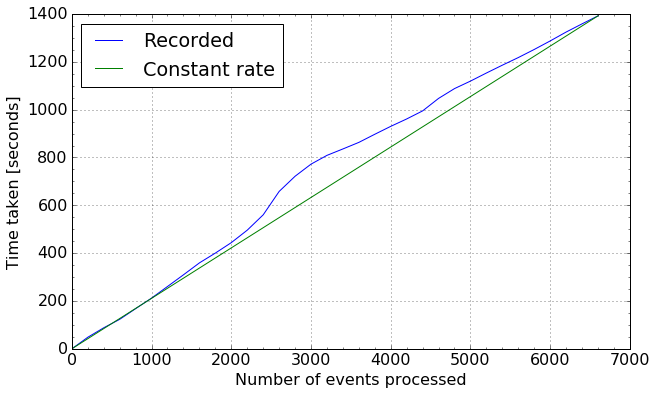

In [81]:
fig = plt.figure()
fig.set_size_inches(10, 6)
plt.plot(event_counts, delta_times, label='Recorded')
plt.plot([0, event_counts[-1]], [0, delta_times[-1]], label='Constant rate')
plt.xlabel('Number of events processed')
plt.ylabel('Time taken [seconds]')
plt.grid(which='major')
plt.minorticks_on()
plt.legend(loc=0)

In [65]:
delta_times2 = [(timestamps[i+1] - timestamps[i]).total_seconds() for i in range(0, len(timestamps)-1)]

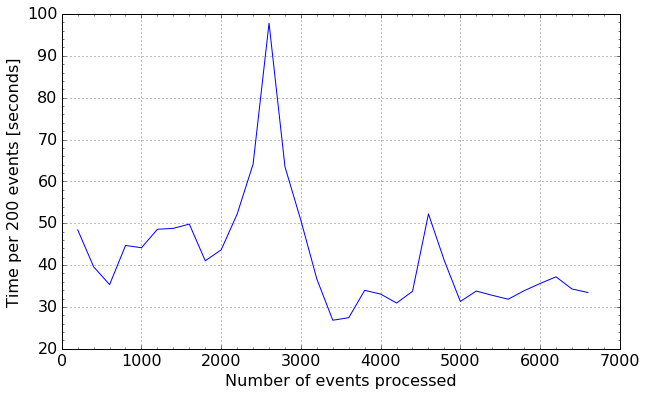

In [71]:
fig = plt.figure()
fig.set_size_inches(10, 6)
plt.plot(event_counts[1:], delta_times2)
plt.xlabel('Number of events processed')
plt.ylabel('Time per 200 events [seconds]')
plt.grid(which='major')
plt.minorticks_on()

# Conclusion

No evidence of slowdown. Carry on.